In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Monte Google Drive vikenvik9@gmail.com

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
!pip install hdbscan
import hdbscan
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import KFold
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1 Exploration et pré-traitement des données

In [ ]:
# Chargement et visualisation du dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("drive/MyDrive/Bloc3Viken/Bloc3-Ex2-uber.csv")
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,12/16/2018 9:30,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,11/27/2018 2:00,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,11/28/2018 1:00,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,11/30/2018 4:53,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,11/29/2018 3:49,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# Afficher le nombre de lignes et colonnes du dataframe
df.shape

(9345, 57)

In [ ]:
# Identifier les valeurs manquantes et explorer le type des données du dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9345 non-null   object 
 1   timestamp                    9345 non-null   float64
 2   hour                         9345 non-null   int64  
 3   day                          9345 non-null   int64  
 4   month                        9345 non-null   int64  
 5   datetime                     9345 non-null   object 
 6   timezone                     9345 non-null   object 
 7   source                       9345 non-null   object 
 8   destination                  9345 non-null   object 
 9   cab_type                     9345 non-null   object 
 10  product_id                   9345 non-null   object 
 11  name                         9345 non-null   object 
 12  price                        8627 non-null   float64
 13  distance          

In [ ]:
# Créer un nouveau dataframe conservant les colonnes numériques, la colonne cab_type, la colonne datetime
colonnes_a_garder = df.select_dtypes(include=['number']).columns.tolist()
colonnes_a_garder.extend(['cab_type', 'datetime'])

df_new = df[colonnes_a_garder].copy()  # Créer le nouveau DataFrame


In [ ]:
# Convertir la colonne datetime au format datetime et supprimer les colonnes id et timestamp
df_new = df_new.drop(columns=['id', 'timestamp'], errors='ignore')  # Supprimer sans erreur si colonne absente
df_new['datetime'] = pd.to_datetime(df_new['datetime'])  # Convertir datetime
df_new.info()  # Vérifier que datetime est bien en format datetime64
df_new.head()  # Afficher les premières lignes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hour                         9345 non-null   int64         
 1   day                          9345 non-null   int64         
 2   month                        9345 non-null   int64         
 3   price                        8627 non-null   float64       
 4   distance                     9345 non-null   float64       
 5   surge_multiplier             9345 non-null   float64       
 6   latitude                     9345 non-null   float64       
 7   longitude                    9345 non-null   float64       
 8   temperature                  9345 non-null   float64       
 9   apparentTemperature          9345 non-null   float64       
 10  precipIntensity              9345 non-null   float64       
 11  precipProbability            9345 non-null 

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type,datetime
0,9,16,12,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Lyft,2018-12-16 09:30:00
1,2,27,11,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Lyft,2018-11-27 02:00:00
2,1,28,11,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Lyft,2018-11-28 01:00:00
3,4,30,11,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Lyft,2018-11-30 04:53:00
4,3,29,11,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Lyft,2018-11-29 03:49:00


In [ ]:
# Remplir les valeurs manquantes de la colonne price par la moyenne de la colonne price

# Initialiser l'imputer avec la stratégie "mean"
imputer = SimpleImputer(strategy="mean")

# Appliquer l'imputation sur la colonne 'price' et conserver le résultat dans le DataFrame
df_new[['price']] = imputer.fit_transform(df_new[['price']])

# Vérifier si les valeurs manquantes ont été remplies
print(df_new['price'].isnull().sum())  # Doit afficher 0
df_new.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hour                         9345 non-null   int64         
 1   day                          9345 non-null   int64         
 2   month                        9345 non-null   int64         
 3   price                        9345 non-null   float64       
 4   distance                     9345 non-null   float64       
 5   surge_multiplier             9345 non-null   float64       
 6   latitude                     9345 non-null   float64       
 7   longitude                    9345 non-null   float64       
 8   temperature                  9345 non-null   float64       
 9   apparentTemperature          9345 non-null   float64       
 10  precipIntensity              9345 non-null   float64       
 11  precipProbability            9345 non-nul

In [ ]:
# Suppression des colonnes non pertinentes
colonnes_a_supprimer = [
    # Colonnes redondantes ou inutiles
    'apparentTemperature', 'temperatureHigh', 'temperatureLow',
    'apparentTemperatureHigh', 'apparentTemperatureLow',
    'visibility.1', 'dewPoint', 'pressure', 'ozone', 'moonPhase', 'windBearing',

    # Colonnes temporelles inutiles (suppression de la colonne month car seulement novembre et décembre)
    'windGustTime', 'temperatureHighTime', 'temperatureLowTime',
    'apparentTemperatureHighTime', 'apparentTemperatureLowTime',
    'sunriseTime', 'sunsetTime', 'uvIndexTime', 'month'

    # Autres colonnes non pertinentes
    'precipProbability', 'windGust', 'temperatureMin', 'temperatureMinTime',
    'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
    'apparentTemperatureMinTime', 'apparentTemperatureMax',
    'apparentTemperatureMaxTime'
]

# Supprimer les colonnes
df_new = df_new.drop(columns=colonnes_a_supprimer, errors='ignore')

# Ajouter colonnes transformant l'heure en coordonnées circulaires
df_new["hour_sin"] = np.sin(2 * np.pi * df_new["hour"] / 24)
df_new["hour_cos"] = np.cos(2 * np.pi * df_new["hour"] / 24)

# Ajouter colonnes transformant le jour en coordonnées circulaires
df_new['day_sin'] = np.sin(2 * np.pi * df_new['day'] / 7)
df_new['day_cos'] = np.cos(2 * np.pi * df_new['day'] / 7)

# Sélectionner uniquement les colonnes finales utiles
colonnes_finales = [
    'datetime', 'cab_type', 'hour', 'hour_sin', 'hour_cos', 'day', 'day_sin', 'day_cos', 'distance', 'latitude', 'longitude',
    'price', 'surge_multiplier', 'temperature', 'humidity', 'windSpeed',
    'precipIntensity', 'cloudCover', 'visibility'
]
df_clean = df_new[colonnes_finales].copy()

# Afficher un aperçu du DataFrame nettoyé
print(df_clean.info())
print(df_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          9345 non-null   datetime64[ns]
 1   cab_type          9345 non-null   object        
 2   hour              9345 non-null   int64         
 3   hour_sin          9345 non-null   float64       
 4   hour_cos          9345 non-null   float64       
 5   day               9345 non-null   int64         
 6   day_sin           9345 non-null   float64       
 7   day_cos           9345 non-null   float64       
 8   distance          9345 non-null   float64       
 9   latitude          9345 non-null   float64       
 10  longitude         9345 non-null   float64       
 11  price             9345 non-null   float64       
 12  surge_multiplier  9345 non-null   float64       
 13  temperature       9345 non-null   float64       
 14  humidity          9345 n

In [ ]:
# Coordonnées de Boston (référence)
lat_boston = 42.3601
long_boston = -71.0589

# Fonction pour calculer la distance avec la formule Haversine (en kilomètres)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Rayon de la Terre en kilomètres
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c  # Retourne la distance en kilomètres

# Fonction pour calculer l'angle (en radians)
def calculate_angle(lat1, lon1, lat2, lon2):
    # Calcul de l'angle entre les points
    return np.arctan2(lon2 - lon1, lat2 - lat1)

# Appliquer la fonction pour calculer la distance et l'angle à chaque ligne
df_clean['distance_pol'] = df.apply(lambda row: haversine(lat_boston, long_boston, row['latitude'], row['longitude']), axis=1)
df_clean['angle'] = df.apply(lambda row: calculate_angle(lat_boston, long_boston, row['latitude'], row['longitude']), axis=1)

# Afficher un échantillon pour vérifier
print(df_clean[['latitude', 'longitude', 'distance_pol', 'angle']].head())


   latitude  longitude  distance_pol     angle
0   42.2148    -71.033      16.29649  2.965193
1   42.2148    -71.033      16.29649  2.965193
2   42.2148    -71.033      16.29649  2.965193
3   42.2148    -71.033      16.29649  2.965193
4   42.2148    -71.033      16.29649  2.965193


In [ ]:
# Afficher les statistiques pour les colonnes numériques
df_clean.describe()

,datetime,hour,hour_sin,hour_cos,day,day_sin,day_cos,distance,latitude,longitude,price,surge_multiplier,temperature,humidity,windSpeed,precipIntensity,cloudCover,visibility,distance_pol,angle
count,9345,9345.000000,9345.000000,9.345000e+03,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000
mean,2018-12-05 17:09:53.804173312,11.518352,-0.019924,7.410498e-03,17.921241,0.201551,0.176642,2.126278,42.337999,-71.066217,16.307813,1.012975,39.591296,0.739766,6.238421,0.008931,0.685764,8.457400,3.471053,-0.218702
min,2018-11-26 04:40:00,0.000000,-1.000000,-1.000000e+00,1.000000,-0.974928,-0.900969,0.300000,42.214800,-71.105400,2.500000,1.000000,18.910000,0.380000,0.450000,0.000000,0.000000,0.717000,0.566389,-2.559240
25%,2018-11-28 21:05:00,5.000000,-0.707107,-7.071068e-01,13.000000,-0.433884,-0.222521,1.250000,42.350300,-71.081000,9.500000,1.000000,36.530000,0.640000,3.450000,0.000000,0.370000,8.432000,0.751127,-1.964558
50%,2018-12-02 04:53:00,12.000000,0.000000,6.123234e-17,17.000000,0.433884,0.623490,2.010000,42.351900,-71.063100,15.000000,1.000000,40.490000,0.710000,5.920000,0.000000,0.820000,9.882000,0.980270,-0.610726
75%,2018-12-14 18:10:00,17.000000,0.707107,7.071068e-01,28.000000,0.781831,0.623490,2.850000,42.364700,-71.054200,22.500000,1.000000,43.580000,0.880000,8.410000,0.000000,1.000000,10.000000,3.902823,0.796150
max,2018-12-18 19:15:00,23.000000,1.000000,1.000000e+00,30.000000,0.974928,1.000000,7.460000,42.366100,-71.033000,67.500000,2.500000,57.220000,0.960000,15.000000,0.144700,1.000000,10.000000,16.296490,2.965193
std,NaN,6.992467,0.699058,7.148241e-01,10.005179,0.677691,0.684843,1.134414,0.048042,0.020417,8.781358,0.088910,6.801420,0.138943,3.151317,0.027046,0.359984,2.618748,5.070032,1.955674


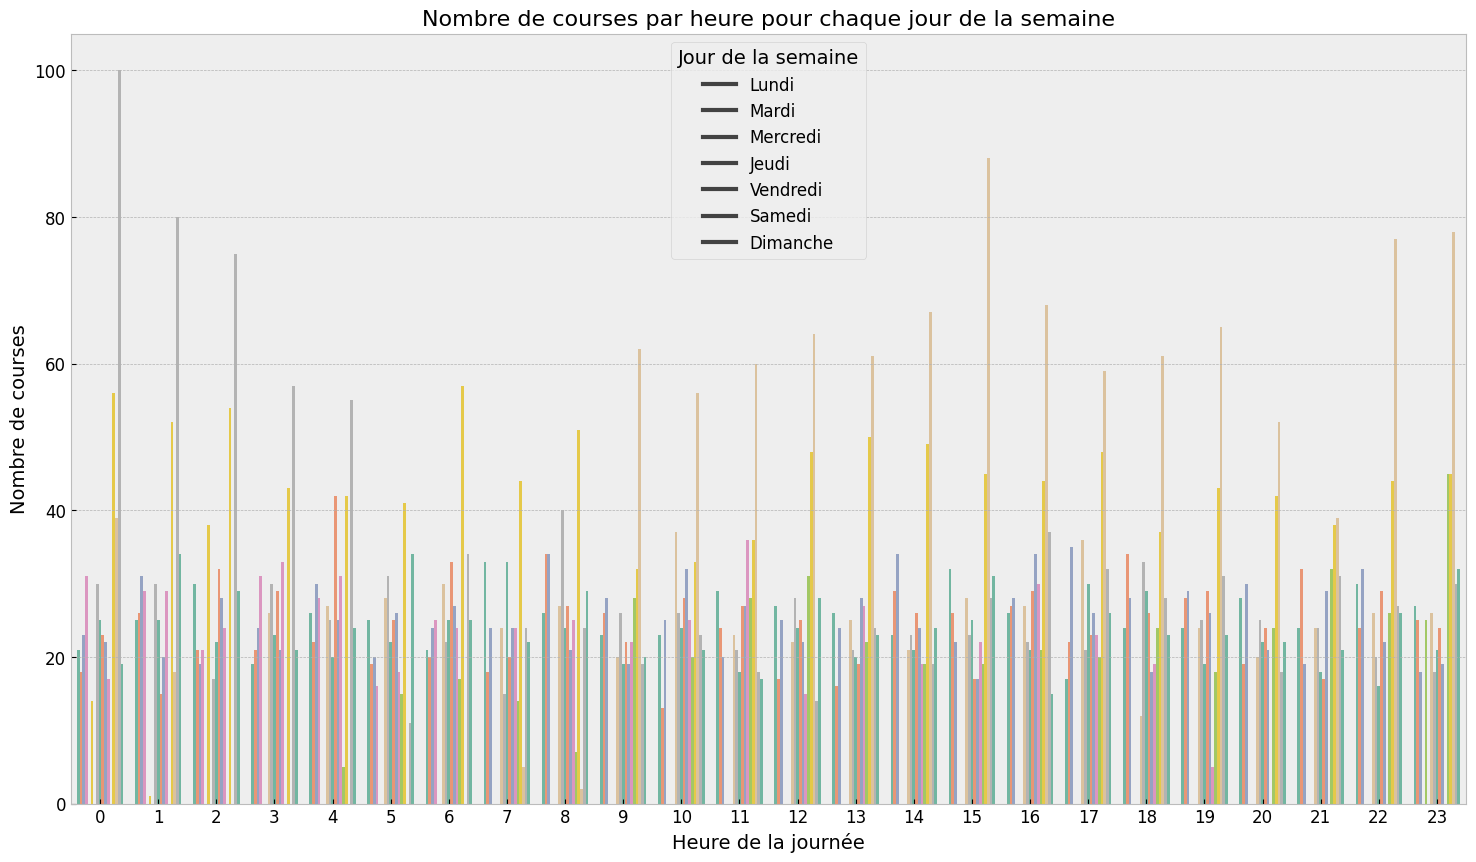

In [ ]:
# Regrouper le nombre de courses par jour et par heure
df_grouped = df_clean.groupby(['day', 'hour']).size().reset_index(name='count')

# Créer le graphique
plt.figure(figsize=(18, 10))
sns.barplot(data=df_grouped, x='hour', y='count', hue='day', palette="Set2", width=0.8)

# Ajouter des labels
plt.xlabel('Heure de la journée', fontsize=14)
plt.ylabel('Nombre de courses', fontsize=14)
plt.title('Nombre de courses par heure pour chaque jour de la semaine', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Modifier la légende
plt.legend(title="Jour de la semaine", labels=['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'], fontsize=12, title_fontsize=14)

# Afficher le graphique
plt.show()


                      hour  hour_sin  hour_cos       day   day_sin   day_cos  \
hour              1.000000 -0.764504 -0.124479  0.054365 -0.047365  0.105045   
hour_sin         -0.764504  1.000000  0.023295 -0.071058  0.017206 -0.101375   
hour_cos         -0.124479  0.023295  1.000000 -0.012188  0.067481 -0.029905   
day               0.054365 -0.071058 -0.012188  1.000000 -0.277128  0.347007   
day_sin          -0.047365  0.017206  0.067481 -0.277128  1.000000 -0.155609   
day_cos           0.105045 -0.101375 -0.029905  0.347007 -0.155609  1.000000   
distance          0.014217  0.004212  0.003175 -0.006570 -0.002935 -0.004231   
latitude          0.018601 -0.037912 -0.073255 -0.007333 -0.004523  0.067968   
longitude         0.008881  0.030440 -0.038596  0.080808 -0.038364  0.064728   
price            -0.000791 -0.001905  0.020661 -0.001687  0.004428  0.005880   
surge_multiplier -0.021277  0.014134  0.012769 -0.006641 -0.000997 -0.017245   
temperature       0.224628 -0.320701  0.

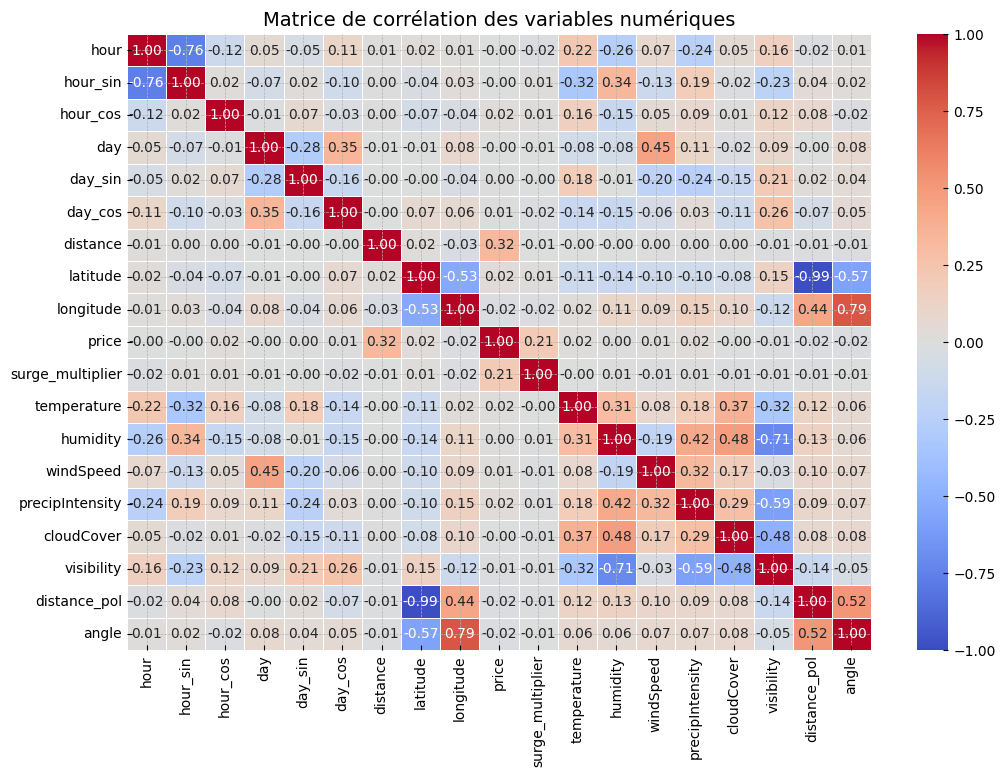

In [ ]:
# Vérifier la corrélation entre les colonnes numériques (utile pour PCA)

# Sélectionner uniquement les colonnes numériques
df_num = df_clean.select_dtypes(include=['number'])

# Calculer la matrice de corrélation
corr_matrix = df_num.corr()
print(corr_matrix)

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Ajouter un titre
plt.title("Matrice de corrélation des variables numériques", fontsize=14)

# Afficher le graphique
plt.show()


In [ ]:
# Création des dataframe Uber et Lyft avant normalisation et PCA
# Liste des colonnes à conserver
"""columns_to_keep = [
    "hour_sin", "hour_cos",  # Heure (périodique)
    "day_sin", "day_cos",  # Jour de la semaine (périodique)
    "latitude", "longitude", "angle", "distance",  # Géographie
    "price", "surge_multiplier",  # Tarification
    "temperature", "humidity", "windSpeed", "precipIntensity", "visibility", "cloudCover"  # Météo
]"""

columns_to_keep = [
    "hour_sin", "hour_cos",  # Heure (périodique)
    "day_sin", "day_cos",  # Jour de la semaine (périodique)
    "latitude", "longitude", "distance",  # Géographie
    "price", "surge_multiplier",  # Tarification
    "temperature", "humidity", "windSpeed", "precipIntensity"  # Météo
]


# Filtrage des DataFrames pour Lyft et Uber
df_pca_lyft = df_clean[df_clean["cab_type"] == "Lyft"][columns_to_keep].copy()
df_pca_uber = df_clean[df_clean["cab_type"] == "Uber"][columns_to_keep].copy()

# Vérification des tailles des datasets
print("Nombre de courses Lyft :", df_pca_lyft.shape[0])
print("Nombre de courses Uber :", df_pca_uber.shape[0])

# Affichage des premières lignes
df_pca_lyft.head(), df_pca_uber.head()

Nombre de courses Lyft : 4301
Nombre de courses Uber : 5044


(   hour_sin  hour_cos       day_sin   day_cos  latitude  longitude  distance  \
 0  0.707107 -0.707107  9.749279e-01 -0.222521   42.2148    -71.033      0.44   
 1  0.500000  0.866025 -7.818315e-01  0.623490   42.2148    -71.033      0.44   
 2  0.258819  0.965926 -9.797174e-16  1.000000   42.2148    -71.033      0.44   
 3  0.866025  0.500000  9.749279e-01 -0.222521   42.2148    -71.033      0.44   
 4  0.707107  0.707107  7.818315e-01  0.623490   42.2148    -71.033      0.44   
 
    price  surge_multiplier  temperature  humidity  windSpeed  precipIntensity  
 0    5.0               1.0        42.34      0.68       8.66           0.0000  
 1   11.0               1.0        43.58      0.94      11.98           0.1299  
 2    7.0               1.0        38.33      0.75       7.33           0.0000  
 3   26.0               1.0        34.38      0.73       5.28           0.0000  
 4    9.0               1.0        37.44      0.70       9.14           0.0000  ,
     hour_sin  hour_cos  

2 - Normalisation des données avant PCA

In [ ]:
# Normalisation des données pour Lyft
scaler_lyft = StandardScaler()
df_pca_lyft_scaled = scaler_lyft.fit_transform(df_pca_lyft)

# Normalisation des données pour Uber
scaler_uber = StandardScaler()
df_pca_uber_scaled = scaler_uber.fit_transform(df_pca_uber)

# Vérification de la forme des matrices normalisées
print("Shape Lyft (normalisé) :", df_pca_lyft_scaled.shape)
print("Shape Uber (normalisé) :", df_pca_uber_scaled.shape)

Shape Lyft (normalisé) : (4301, 13)
Shape Uber (normalisé) : (5044, 13)


3 - Analyse en composantes principales

In [ ]:
# PCA pour Lyft
pca_lyft = PCA(n_components=8, svd_solver='auto')
pca_lyft_components = pca_lyft.fit_transform(df_pca_lyft_scaled)

# PCA pour Uber
pca_uber = PCA(n_components=8, svd_solver='auto')
pca_uber_components = pca_uber.fit_transform(df_pca_uber_scaled)

# Création des DataFrames avec les composantes principales pour Lyft et Uber
df_pca_lyft_components = pd.DataFrame(pca_lyft_components, columns=[f'PC{i+1}' for i in range(8)])
df_pca_uber_components = pd.DataFrame(pca_uber_components, columns=[f'PC{i+1}' for i in range(8)])

# Affichage des premières lignes pour vérifier
print("Composantes principales Lyft :")
print(df_pca_lyft_components.head())

print("Composantes principales Uber :")
print(df_pca_uber_components.head())

# Vérification de la variance expliquée par chaque composante principale
print("\nVariance expliquée par chaque composante pour Lyft :")
print(pca_lyft.explained_variance_ratio_)

print("\nVariance expliquée par chaque composante pour Uber :")
print(pca_uber.explained_variance_ratio_)


Composantes principales Lyft :
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.730837 -0.497980 -2.635225 -0.154961 -1.692462  0.354937  0.509629   
1  5.720326 -1.414432 -0.023011 -1.025414  1.058908  0.868625  0.821029   
2  1.857102 -1.515578 -1.902553 -0.712352 -1.449171  0.751785  0.858908   
3  1.423777  0.174757 -1.354624  0.032709 -2.786404  1.363505  0.482463   
4  1.731949 -1.177525 -2.006179 -0.415336 -1.818937  1.335499  0.596800   

        PC8  
0 -1.169051  
1  0.942776  
2  1.335359  
3  0.085440  
4  0.642090  
Composantes principales Uber :
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.836965  0.072669  1.232499 -1.377077 -0.033939  0.838885  0.511574   
1 -1.355657 -0.594740 -3.338035 -0.581370  0.197438 -0.158792 -0.222558   
2 -1.582114  1.250698 -1.111611 -1.172618 -0.317872 -0.336478  0.809169   
3  1.489251  0.262886  0.884295 -0.442782 -1.612861  0.876195  0.552765   
4 -1.168300  0.048622 -0.845

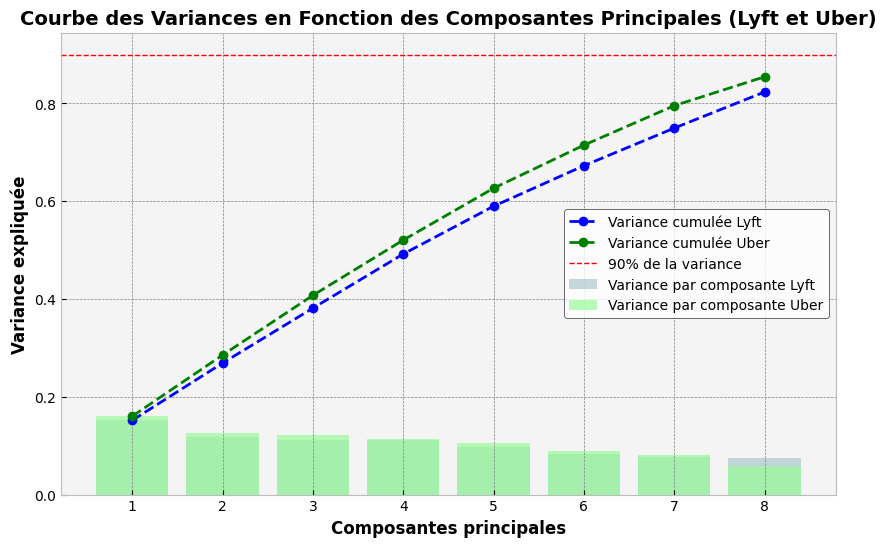

In [ ]:
# Récupérer la variance expliquée par composante et la variance cumulée
explained_variance_ratio_lyft = pca_lyft.explained_variance_ratio_
explained_variance_ratio_uber = pca_uber.explained_variance_ratio_

# Création de la figure
plt.figure(figsize=(10, 6))

# Courbe de variance cumulée pour Lyft
plt.plot(np.arange(1, len(explained_variance_ratio_lyft) + 1), np.cumsum(explained_variance_ratio_lyft),
         marker='o', linestyle='--', color='b', label='Variance cumulée Lyft')

# Barplot de variance par composante pour Lyft
plt.bar(np.arange(1, len(explained_variance_ratio_lyft) + 1), explained_variance_ratio_lyft,
        alpha=0.7, color='#AEC6CF', label='Variance par composante Lyft')

# Courbe de variance cumulée pour Uber
plt.plot(np.arange(1, len(explained_variance_ratio_uber) + 1), np.cumsum(explained_variance_ratio_uber),
         marker='o', linestyle='--', color='g', label='Variance cumulée Uber')

# Barplot de variance par composante pour Uber
plt.bar(np.arange(1, len(explained_variance_ratio_uber) + 1), explained_variance_ratio_uber,
        alpha=0.7, color='#98FB98', label='Variance par composante Uber')

# Axe X avec des valeurs de 1 en 1
plt.xticks(np.arange(1, len(explained_variance_ratio_lyft) + 1, 1))

# Ligne horizontale pour les 90% de variance expliquée
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=1, label='90% de la variance')

# Labels et titre
plt.xlabel('Composantes principales', fontsize=12, fontweight='bold')
plt.ylabel('Variance expliquée', fontsize=12, fontweight='bold')
plt.title('Courbe des Variances en Fonction des Composantes Principales (Lyft et Uber)', fontsize=14, fontweight='bold')

# Activation du fond gris pour la grille
plt.gca().set_facecolor('#f4f4f4')  # Fond gris

# Ajout d'un quadrillage visible en pointillés gris clair
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Ajout de la légende
plt.legend(frameon=True, facecolor='white', edgecolor='black')

# Affichage du graphique
plt.show()

In [ ]:
# Imprimer les composantes principales pour Uber
print("Composantes principales pour Uber:")
print(pca_uber.components_)

# Imprimer les composantes principales pour Lyft
print("Composantes principales pour Lyft:")
print(pca_lyft.components_)

Composantes principales pour Uber:
[[ 1.86624225e-01  2.45093842e-02 -3.96795819e-02 -1.65648320e-01
  -4.28596441e-01  3.96114023e-01 -8.59425013e-03  1.95710740e-02
  -0.00000000e+00  2.88628223e-01  4.99144783e-01  1.55397725e-01
   4.87748417e-01]
 [-5.09187600e-01  1.51944678e-01 -3.10369467e-01  2.13311838e-01
  -1.78082918e-01  1.91061027e-01 -8.24624593e-02 -5.84881319e-02
  -0.00000000e+00  1.23016639e-01 -4.14476839e-01  5.48060493e-01
   1.00381518e-01]
 [-3.60816144e-01  2.96171370e-01  4.66676392e-01 -3.31476422e-01
   2.44218836e-02 -2.01158941e-01  5.64277569e-02  1.00152511e-01
  -0.00000000e+00  6.15585065e-01  1.64114244e-02 -2.65041947e-02
  -1.42260369e-01]
 [ 5.43391099e-02  6.12229130e-02 -2.73865486e-01 -4.49213078e-03
   3.37588174e-01 -3.26136210e-01  5.08006369e-01  5.24197707e-01
  -1.66533454e-16  3.81700513e-02  8.10357608e-02  2.29467440e-01
   3.23130267e-01]
 [-5.28398308e-02 -1.54119043e-02  1.69779448e-01  1.10639913e-01
  -3.95935244e-01  4.20146584e-

In [ ]:
# Créer un DataFrame pour les poids (loadings) des composantes principales pour Uber
loadings_uber = pd.DataFrame(pca_uber.components_, columns=columns_to_keep)

# Créer un DataFrame pour les poids (loadings) des composantes principales pour Lyft
loadings_lyft = pd.DataFrame(pca_lyft.components_, columns=columns_to_keep)

# Afficher les DataFrames des poids (loadings) pour Uber et Lyft
print("Loadings pour Uber:")
print(loadings_uber)

print("\nLoadings pour Lyft:")
print(loadings_lyft)

Loadings pour Uber:
   hour_sin  hour_cos   day_sin   day_cos  latitude  longitude  distance  \
0  0.186624  0.024509 -0.039680 -0.165648 -0.428596   0.396114 -0.008594   
1 -0.509188  0.151945 -0.310369  0.213312 -0.178083   0.191061 -0.082462   
2 -0.360816  0.296171  0.466676 -0.331476  0.024422  -0.201159  0.056428   
3  0.054339  0.061223 -0.273865 -0.004492  0.337588  -0.326136  0.508006   
4 -0.052840 -0.015412  0.169779  0.110640 -0.395935   0.420147  0.480841   
5  0.446256  0.687036  0.106558 -0.298342 -0.122467  -0.034608 -0.042395   
6  0.012056  0.526585 -0.001843  0.702074  0.059671   0.010955 -0.073883   
7  0.160818 -0.234321  0.682886  0.326612  0.184757   0.087328 -0.203699   

      price  surge_multiplier  temperature  humidity  windSpeed  \
0  0.019571     -0.000000e+00     0.288628  0.499145   0.155398   
1 -0.058488     -0.000000e+00     0.123017 -0.414477   0.548060   
2  0.100153     -0.000000e+00     0.615585  0.016411  -0.026504   
3  0.524198     -1.665335e-

4 - Sélection du modèle


Méthode du coude pour Uber :


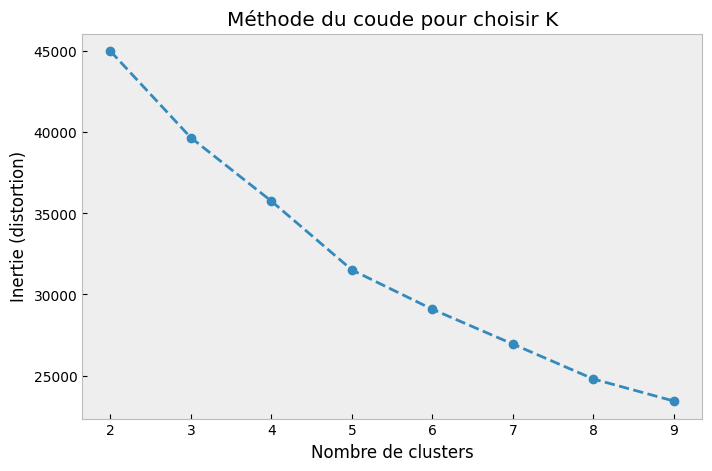

Méthode du coude pour Lyft :


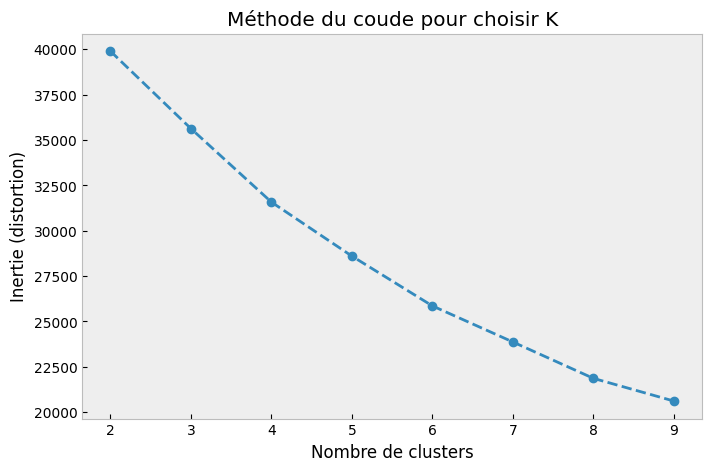

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fonction pour la méthode du coude
def elbow_method(pca_features, K_range=range(2, 10)):
    inertia = []

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(pca_features)
        inertia.append(kmeans.inertia_)

    # Tracer la courbe du coude
    plt.figure(figsize=(8,5))
    plt.plot(K_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Nombre de clusters')
    plt.ylabel('Inertie (distortion)')
    plt.title('Méthode du coude pour choisir K')
    plt.grid()
    plt.show()

# Appliquer la méthode du coude pour Uber
print("Méthode du coude pour Uber :")
elbow_method(pca_uber_components)  # Appliquer sur les données transformées par PCA pour Uber

# Appliquer la méthode du coude pour Lyft
print("Méthode du coude pour Lyft :")
elbow_method(pca_lyft_components)  # Appliquer sur les données transformées par PCA pour Lyft


In [ ]:
# Réduction à 2 dimensions pour visualisation
#pca_2D = PCA(n_components=2)
#reduced_matrix_uber = pca_2D.fit_transform(df_pca_uber_scaled)
#reduced_matrix_lyft = pca_2D.fit_transform(df_pca_lyft_scaled)

In [ ]:
# Choisir le nombre optimal de cluster selon la méthode du coude et appliquer Kmeans

# Appliquer KMeans sur les données réduites à 2 dimensions pour Uber
kmeans_uber = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_uber = kmeans_uber.fit_predict(df_pca_uber_components)

# Appliquer KMeans sur les données réduites à 2 dimensions pour Lyft
kmeans_lyft = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_lyft = kmeans_lyft.fit_predict(df_pca_lyft_components)

# Ajouter les labels des clusters
df_pca_uber_components['Cluster'] = labels_uber # Ajouter la colonne "Cluster" avec les labels KMeans
df_pca_lyft_components['Cluster'] = labels_lyft # Ajouter la colonne "Cluster" avec les labels KMeans

# Ajouter les labels des clusters aux DataFrames Uber et Lyft
df_uber_clustered = df_pca_uber.copy()  # Créer une copie du DataFrame Uber
df_uber_clustered['Cluster'] = labels_uber  # Ajouter la colonne "Cluster" avec les labels KMeans

df_lyft_clustered = df_pca_lyft.copy()  # Créer une copie du DataFrame Lyft
df_lyft_clustered['Cluster'] = labels_lyft  # Ajouter la colonne "Cluster" avec les labels KMeans

# Afficher les résultats
print("Clusters Uber:")
print(df_uber_clustered.head())

print("\nClusters Lyft:")
print(df_lyft_clustered.head())

Clusters Uber:
    hour_sin  hour_cos       day_sin   day_cos  latitude  longitude  distance  \
12 -0.500000  0.866025  9.749279e-01 -0.222521   42.3647   -71.0542      1.11   
13  0.500000 -0.866025 -7.818315e-01  0.623490   42.3647   -71.0542      1.11   
14 -0.965926  0.258819 -7.818315e-01  0.623490   42.3647   -71.0542      1.11   
15 -0.258819  0.965926  9.749279e-01 -0.222521   42.3647   -71.0542      1.11   
16  0.000000  1.000000 -4.898587e-16  1.000000   42.3647   -71.0542      1.11   

    price  surge_multiplier  temperature  humidity  windSpeed  \
12   12.0               1.0        40.13      0.60       3.38   
13   16.0               1.0        20.38      0.66       2.94   
14    7.5               1.0        32.85      0.56       2.65   
15    7.5               1.0        41.29      0.86       8.30   
16   26.0               1.0        31.25      0.64       2.62   

    precipIntensity  Cluster  
12           0.0000        2  
13           0.0000        4  
14           0

In [ ]:
# Réduction en 2D pour visualisation
pca_2D = PCA(n_components=2)
reduced_matrix_uber = pca_2D.fit_transform(df_pca_uber_components.drop(columns=['Cluster']))
reduced_matrix_lyft = pca_2D.fit_transform(df_pca_lyft_components.drop(columns=['Cluster']))

In [ ]:
# Ajouter les labels de clusters pour visualisation
df_pca_uber_2D = pd.DataFrame(reduced_matrix_uber, columns=['PC1', 'PC2'])
df_pca_uber_2D['Cluster'] = labels_uber

df_pca_lyft_2D = pd.DataFrame(reduced_matrix_lyft, columns=['PC1', 'PC2'])
df_pca_lyft_2D['Cluster'] = labels_lyft

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


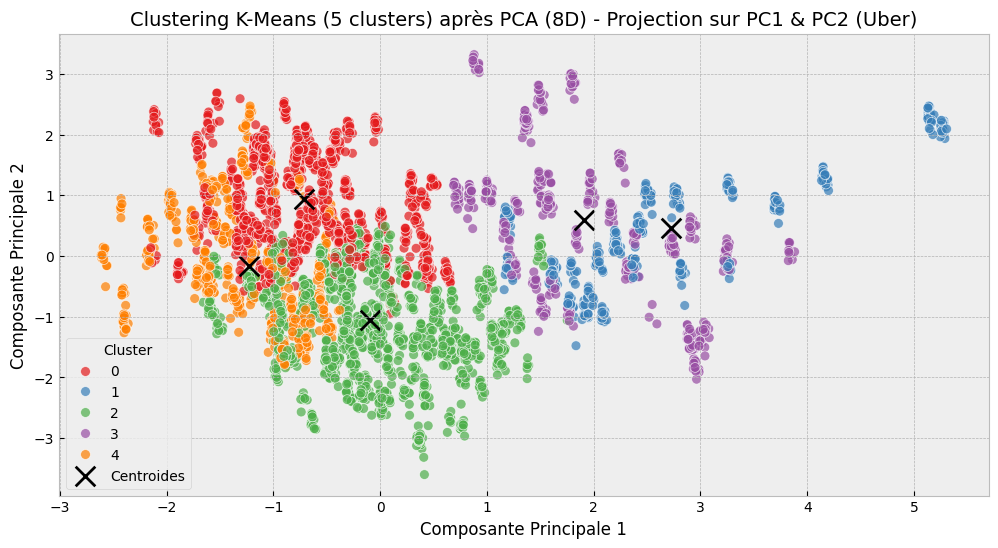

Centroïdes projetés en 2D (Uber) :
[[-0.7167709   0.94193522]
 [ 2.72248284  0.45210508]
 [-0.09377924 -1.05592545]
 [ 1.90613779  0.59217468]
 [-1.23276222 -0.15822204]]


In [ ]:
# Visualisation des clusters Uber et clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_uber_2D, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_uber_8D = kmeans_uber.cluster_centers_
centroids_uber_2D = pca_2D.transform(centroids_uber_8D)  # Projeter en 2D

# Affichage des centroïdes
plt.scatter(centroids_uber_2D[:, 0], centroids_uber_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (5 clusters) après PCA (8D) - Projection sur PC1 & PC2 (Uber)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes projetés en 2D (Uber) :")
print(centroids_uber_2D)

In [ ]:
# Ajouter les labels de clusters dans le DataFrame Uber (df_pca_uber)
df_pca_uber['Cluster'] = labels_uber

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_uber = df_pca_uber.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Uber :")
print(cluster_summary_uber)

Résumé des caractéristiques des clusters pour Uber :
         hour_sin  hour_cos   day_sin   day_cos   latitude  longitude  \
Cluster                                                                 
0       -0.715001  0.036557  0.168031  0.427111  42.356423 -71.071183   
1        0.399978  0.096133 -0.398300  0.264902  42.332444 -71.058840   
2        0.394979  0.134028  0.583606 -0.177246  42.355249 -71.073890   
3       -0.040425  0.024952  0.377724  0.008600  42.214800 -71.033000   
4        0.226117 -0.376305 -0.351273  0.559445  42.357430 -71.067753   

         distance      price  surge_multiplier  temperature  humidity  \
Cluster                                                                 
0        2.130895  15.815525               1.0    43.071633  0.667061   
1        2.141667  16.628490               1.0    43.523542  0.917130   
2        2.187364  16.036644               1.0    39.875933  0.791310   
3        2.121230  15.397847               1.0    41.318101  0.776456 

**Interprétation possible des clusters Uber**

-**Cluster 0** : Courses en soirée durant jours proches du week-end, dans le centre-ville (peut-être en sortie du travail) avec un prix moyen, sans surcharge de tarification et conditions météo modérées

-**Cluster 1** : Courses en matinée et en semaine en centre ville de Boston avec des prix plus élevés, souvent avec une forte humidité, un vent plus fort et des précipitations

-**Cluster 2** : Trajets de fin de journée en fin de semaine plus au sud-est du centre ville de Boston avec des prix moyens et une météo stable plus froide, moins venteuse et avec faibles précipitations

-**Cluster 3** : Trajets tôt le matin en début de semaine, dans des zones moins centrales (peut-être dans les banlieues), avec des températures modérées et un peu de pluie

-**Cluster 4** : Trajets du soir en milieu de semaine, plus au nord ou à l'ouest de Boston, en hiver avec des prix plus bas

-Les **clusters 0, 1 et 2** sont associés à des trajets dans des zones urbaines (proches du centre de Boston), tandis que les **clusters 3 et 4** semblent plus éloignés du centre-ville avec des trajets plus froids, souvent en dehors des heures de pointe.

**Interprétation possible des distances en clusters Uber**

-Les distances moyennes sont globalement similaires et courtes (~2.1 à 2.18 miles), ce qui est typique des trajets urbains ou semi-urbains dans des villes comme Boston.

 -Ces distances similaires en clusters montrent que les trajets courts sont la norme pour Uber, ce qui peut refléter la nature des services Uber, souvent utilisés pour des trajets rapides dans des zones urbaines ou suburbaines.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


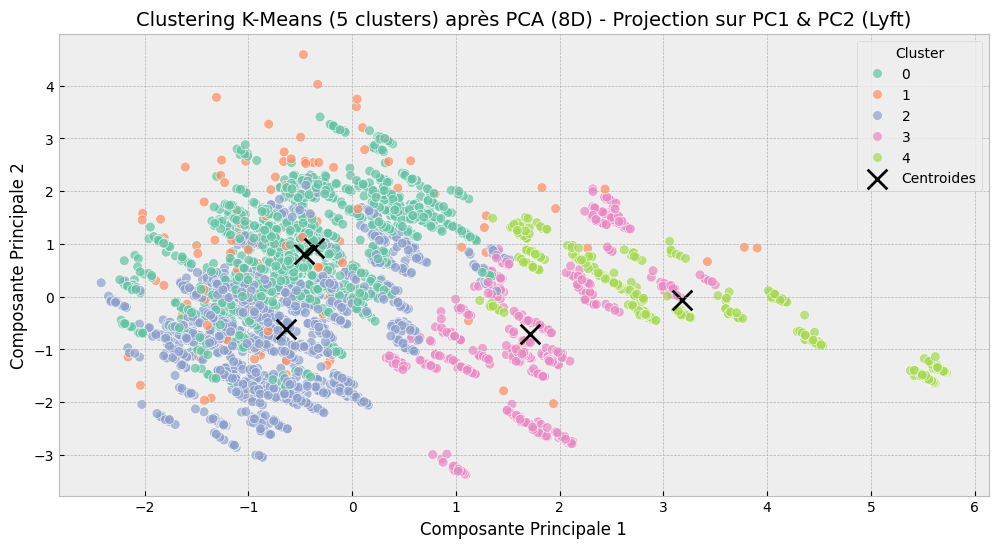

Centroïdes projetés en 2D (Lyft) :
[[-0.46562411  0.81451911]
 [-0.36521294  0.93036819]
 [-0.63348602 -0.61305794]
 [ 1.71199994 -0.71572626]
 [ 3.18061241 -0.06947186]]


In [ ]:
# Visualisation des clusters Lyft dans un espace 2D avec composante principale n°1 et composante principale n°2

# Appliquer un fond gris pour le style
plt.style.use('bmh')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_pca_lyft_2D, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=50, alpha=0.7, edgecolor='w')

# Projeter les centroïdes en 2D
centroids_lyft_8D = kmeans_lyft.cluster_centers_
centroids_lyft_2D = pca_2D.transform(centroids_lyft_8D)  # Projeter en 2D

# Affichage des centroïdes
plt.scatter(centroids_lyft_2D[:, 0], centroids_lyft_2D[:, 1], c='black', marker='x', s=200, label='Centroides', linewidth=2)

# Ajouter un titre et labels
plt.title("Clustering K-Means (5 clusters) après PCA (8D) - Projection sur PC1 & PC2 (Lyft)", fontsize=14)
plt.xlabel("Composante Principale 1", fontsize=12)
plt.ylabel("Composante Principale 2", fontsize=12)
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

# Afficher les centroïdes projetés
print("Centroïdes projetés en 2D (Lyft) :")
print(centroids_lyft_2D)


In [ ]:
# Ajouter les labels de clusters dans le DataFrame Lyft (df_pca_lyft)
df_pca_lyft['Cluster'] = labels_lyft

# Calculer les moyennes des caractéristiques pour chaque cluster
cluster_summary_lyft = df_pca_lyft.groupby("Cluster")[columns_to_keep].mean()

# Afficher les moyennes
print("Résumé des caractéristiques des clusters pour Lyft :")
print(cluster_summary_lyft)

Résumé des caractéristiques des clusters pour Lyft :
         hour_sin  hour_cos   day_sin   day_cos   latitude  longitude  \
Cluster                                                                 
0        0.532324 -0.133933  0.264029  0.062317  42.355696 -71.071692   
1        0.060109  0.088707  0.246316  0.029459  42.344390 -71.071541   
2       -0.649916  0.071544  0.237050  0.294409  42.356103 -71.071466   
3       -0.044062  0.057235  0.346511  0.013250  42.214800 -71.033000   
4        0.488727  0.225831 -0.554449  0.369527  42.324557 -71.056591   

         distance      price  surge_multiplier  temperature  humidity  \
Cluster                                                                 
0        2.087947  16.085433          1.007990    35.471930  0.756466   
1        2.145935  32.065041          1.680894    39.107967  0.740325   
2        2.103328  16.784806          1.008954    42.370971  0.681323   
3        2.021203  15.941909          1.010892    41.129917  0.762407 

**Interprétation possible des clusters Lyft**

-**Cluster 0** : Ce cluster pourrait représenter des trajets réguliers hors heures de pointes tous les jours de la semaine dans une zone centrale de Boston, durant des périodes où la demande est relativement stable et non influencée par des facteurs comme une surcharge élevée ou des conditions météorologiques extrêmes

-**Cluster 1** : Ce cluster pourrait représenter des trajets périodiques domicile-travail en heures de pointe, où une demande forte génère des prix plus élevés, et où la demande de Lyft se concentre dans des zones avec moins de véhicules disponibles ou dans des régions suburbaines de Boston

-**Cluster 2** : Ce cluster pourrait correspondre à des trajets occassionnels ou spécifiques dans la journée centrés autour de Boston. Il semble être plus typique et pourrait correspondre à des déplacements dans un cadre urbain modéré

-**Cluster 3** : Ce cluster pourrait être caractérisé par des trajets moins fréquents dans des zones suburbaines ou périphériques (trajets quotidiens en zones résidentielles), mais avec une demande stable et régulière

-**Cluster 4** : Ce cluster pourrait être caractérisé par des trajets effectués dans des conditions météorologiques moins favorables lors d'un mauvais temps avec vent fort dans des zones éloignées de Boston

**Interprétation possible des distances en clusters Lyft**

-Les distances parcourues sont similaires à celles pour les clusters Uber.

-Les trajets les plus longs (autour de 2.15 km) sont associés à des périodes de demande plus élevée, tandis que les trajets plus courts (2.02 km) sont probablement plus réguliers, à des prix moins élevés et avec une demande plus stable.

5- Evaluation du modèle

In [ ]:
# Calcul du Silhouette Score pour Uber
sil_score_uber = silhouette_score(reduced_matrix_uber, kmeans_uber.labels_)
print(f'Silhouette Score pour Uber: {sil_score_uber}')

# Calcul du Silhouette Score pour Lyft
sil_score_lyft = silhouette_score(reduced_matrix_lyft, kmeans_lyft.labels_)
print(f'Silhouette Score pour Lyft: {sil_score_lyft}')

Silhouette Score pour Uber: 0.15689959104567458
Silhouette Score pour Lyft: 0.15176729109911463


In [ ]:
# Calcul du score de silhouette global dans un espace à 8 dimensions (8 composantes principales)
silhouette_avg_uber = silhouette_score(df_pca_uber_components, labels_uber)
print(f"Score moyen de silhouette uber (8D) : {silhouette_avg_uber:.4f}")

silhouette_avg_lyft = silhouette_score(df_pca_lyft_components, labels_lyft)
print(f"Score moyen de silhouette lyft (8D) : {silhouette_avg_lyft:.4f}")


Score moyen de silhouette uber (8D) : 0.2724
Score moyen de silhouette lyft (8D) : 0.2629


In [ ]:
# Validation croisée avec Kfold pour évaluation de la stabilité des clusters

# Fonction pour calculer la stabilité des clusters
def kfold_validation(X, n_clusters, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    kmeans_inertia = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(X_train)
        kmeans_inertia.append(kmeans.inertia_)  # Inertie sur les données d'entraînement

    # Calculer la moyenne de l'inertie à travers les folds
    mean_inertia = np.mean(kmeans_inertia)
    return mean_inertia

# Validation croisée pour Uber
mean_inertia_uber = kfold_validation(reduced_matrix_uber, n_clusters=4)
print(f'Moyenne de l\'inertie pour Uber (KFold): {mean_inertia_uber}')

# Validation croisée pour Lyft
mean_inertia_lyft = kfold_validation(reduced_matrix_lyft, n_clusters=3)
print(f'Moyenne de l\'inertie pour Lyft (KFold): {mean_inertia_lyft}')

Moyenne de l'inertie pour Uber (KFold): 3886.4168093300577
Moyenne de l'inertie pour Lyft (KFold): 4379.0618588788075


In [ ]:
# Evaluation de la compacité des clusters

# Inertie pour Uber
inertia_uber = kmeans_uber.inertia_
print(f'Inertie pour Uber: {inertia_uber}')

# Inertie pour Lyft
inertia_lyft = kmeans_lyft.inertia_
print(f'Inertie pour Lyft: {inertia_lyft}')

Inertie pour Uber: 31510.56389651449
Inertie pour Lyft: 28598.28351875599


**Analyse des métriques d'évaluation**

**Silhouette score**

-Les scores sont faibles (silhouette score ~0.15 en projection 2D), ce qui indique que les clusters se chevauchent légèrement et que la séparation entre eux n’est pas optimale. Cette séparation est meilleure dans un espace 8D (silhouette score quasiment doublé).

-Cela peut signifier que :
  Les données sont complexes et difficiles à regrouper de manière claire (les clusters sont mieux séparés en 8D qu'en 2D)
  Certains clusters ont une structure moins distincte
  Peut-être qu’un autre nombre de clusters (via l’indice de Davies-Bouldin ou silhouette moyenne optimisée) améliorerait la performance

**Inertie (cohésion interne des clusters)**

-L’inertie de Lyft est légèrement plus faible, ce qui signifie que les points sont un peu plus proches des centroïdes que pour Uber.

-L’inertie KFold (validation croisée) est bien plus basse que l’inertie totale, suggérant que le modèle se généralise mieux sur des sous-ensembles des données que sur l’ensemble complet

**Peut-on améliorer le modèle**

-Les scores de silhouette sont faibles, donc les clusters ne sont pas idéalement séparés

-L’inertie est élevée, indiquant que les points ne sont pas fortement regroupés autour de leurs centroïdes

-En l’état, le clustering est exploitable mais pourrait être amélioré pour mieux capturer la structure des trajets Uber et Lyft.

6- Amélioration possibles du clustering

-Appliquer d’autres techniques de prétraitement des données pour réduire le bruit.

-Essayer d’autres algorithmes comme DBSCAN (si les clusters ne sont pas de forme sphérique) ou Gaussian Mixture Models (GMM) pour capturer des structures plus complexes
